In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import norm
import matplotlib as mpl
# Custom parameters for mpl plots
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.edgecolor'] = 'k'

# Uncertainty propagation

<h2> <a href="https://arm61.github.io">A. R. McCluskey</a><sup>a,b</sup></h2>

<h4> <sup>a</sup> Department of Chemistry, University of Bath, Claverton Down, Bath, BA2 7AY, UK. <br><sup>b</sup> Diamond Light Source, Diamond House, Rutherford Appleton Laboratory, Harwell Oxford, OX11 0DE, UK. </h4>

Uncertainty, or error, propagation is something that students often shy away from. 
This notebook outlines a simple way to investigate uncertainty propagation without needing to do any *real* maths.
For this, we will consider trying to find the value, and associated uncertainty, of the Gibbs free energy change for the following reaction, 

$$ \text{A} \rightarrow 2\text{B} $$

This is a reversible reaction, and therefore the equilibrium constant is defined as follows, 

$$ K = \frac{\text{[B]}^2}{\text{[A]}}, $$

where, $\text{[A]}$ and $\text{[B]}$ are the concentrations of $A$ and $B$ at equilibrium. 
These are measured spectroscopically and have the following values, $\text{[A]} = 1.00\pm0.01~\text{mmolL}^{-1}$ and $\text{[B]} = 40.00\pm0.40~\text{mmolL}^{-1}$, at a temperature of $300~\text{K}$.
Of course the thermostat also has some uncertainty associated with is it which is $1~\%$. 

To determine the Gibbs free energy change, we use the following relationship, 

$$ \Delta G = -RTln(K), $$

where, $R$ is the ideal gas constant which has a known value of $8.3144598(48)~\text{JK}^{-1}\text{mol}^{-1}$.
This means that there are four input parameters to determine $\Delta G$, 

- The ideal gas constant: $8.3144598\pm0.0000048~\text{JK}^{-1}\text{mol}^{-1}$
- The temperature: $300\pm3~\text{K}$
- The concentration of A: $1.00\pm0.01~\text{mmolL}^{-1}$
- The concentration of B: $40.00\pm0.40~\text{mmolL}^{-1}$

For all of these parameters, we assume that the uncertainties are *normally* distributed.
This can therefore can be displayed graphically as shown below.

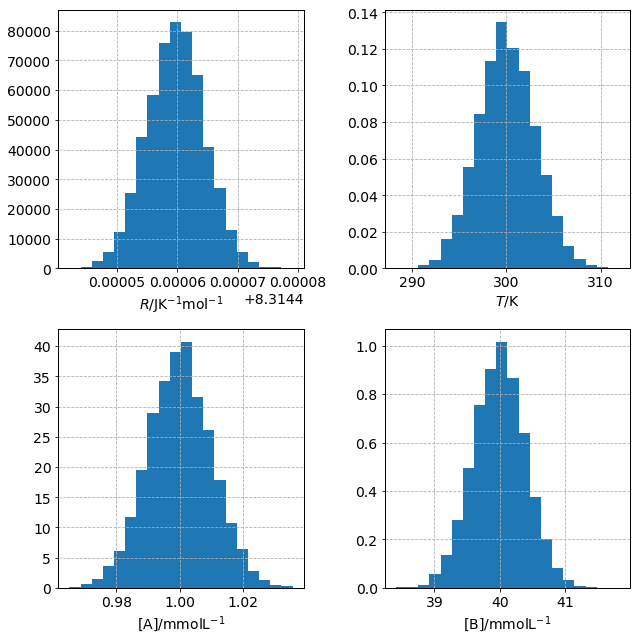

In [2]:
R = np.random.normal(loc=8.3144598, scale=0.0000048, size=10000)
T = np.random.normal(loc=300, scale=3, size=10000)
A = np.random.normal(loc=1e-3, scale=1e-5, size=10000)
B = np.random.normal(loc=4e-2, scale=4e-4, size=10000)

fig, ax = plt.subplots(figsize=(9, 9))
gs = mpl.gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0]); ax1.hist(R, density=True, bins=20); ax1.set_xlabel('$R$/JK$^{-1}$mol$^{-1}$')
ax2 = plt.subplot(gs[0, 1]); ax2.hist(T, density=True, bins=20); ax2.set_xlabel('$T$/K')
ax3 = plt.subplot(gs[1, 0]); ax3.hist(A*1e3, density=True, bins=20); ax3.set_xlabel('[A]/mmolL$^{-1}$')
ax4 = plt.subplot(gs[1, 1]); ax4.hist(B*1e3, density=True, bins=20); ax4.set_xlabel('[B]/mmolL$^{-1}$')
plt.tight_layout()

With the variables, and their uncertainties, all defined, we can create a function for the Gibbs free energy change. 

In [3]:
def Gibbs(R, T, A, B):
    return - R * T * np.log(B ** 2 / A)

Then using the arrays of values that fall into the normal distributions for each variable, we can get an equivalent array for the values of $\Delta G$.  

In [4]:
G = Gibbs(R, T, A, B)
print(G)

[-1200.43552807 -1312.59616754 -1179.97474012 ... -1094.81839807
 -1224.61023313 -1232.26171879]


This can be plotted in a similar fashion to the input variables. 

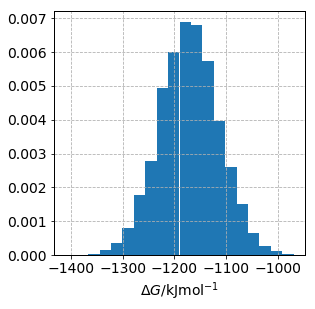

In [5]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.hist(G, bins=20, density=True)
ax.set_xlabel(r'$\Delta G$/kJmol$^{-1}$')
plt.show()

On the initial inspection, this appears to also be normally distributed. 
However, it is possible to assess this using for example a Shapiro-Wilk test. 

In [6]:
stat, p = scipy.stats.shapiro(G)
alpha = 0.05
if p > alpha:
    print('The sample looks normally distributed')
else:
    print('The sample does not look normally distributed')

The sample looks normally distributed


/home/arm61/miniconda3/envs/sim_vs_trad/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


It would appear that the uncertainties for the Gibbs free energy change are normally distributed. 
This means that we can determine the mean and standard deviation for the Gibbs free energy change.

In [7]:
mean, std = norm.fit(G)
print(r'Gibbs free energy change = {:.2f}+/-{:.2f} J/mol'.format(mean, std))

Gibbs free energy change = -1171.13+/-57.14 J/mol
